# 線形回帰

## 最急降下法

### データ準備

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product

In [17]:
df = pd.read_csv('../data/raw/sample_data.csv')
df

,space,rent
0,20,13.958824
1,25,11.533805
2,28,14.269547
3,30,18.722680
4,36,19.602674
5,51,16.068166
6,55,23.183599
7,62,22.212595
8,83,29.357010
9,103,37.565129


### データ可視化

<Axes: xlabel='space', ylabel='rent'>

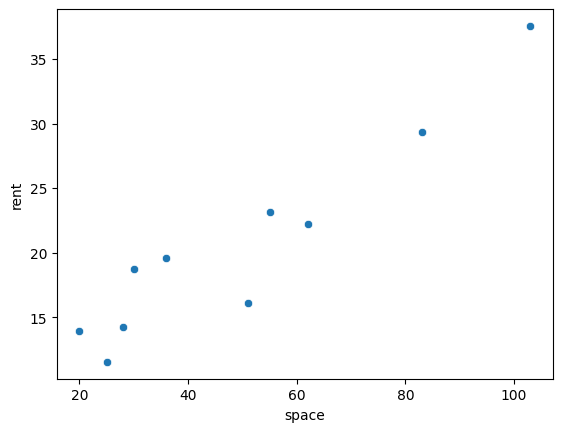

In [18]:
sns.scatterplot(x='space', y='rent', data=df)

### 損失関数定義

In [78]:
x = df['space'].values
y = df['rent'].values

def cost_func(theta_0, theta_1, x, y):
    return np.mean(np.square(y- (theta_0 + theta_1 * x)))
cost_func(5, 7, x=x, y=y)

138703.20244638805

### 損失関数の可視化

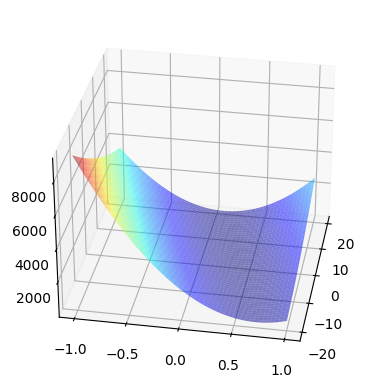

In [82]:
n0 = n1 = 300

min_0 = -20
max_0 = 20
min_1 = -1
max_1 = 1

theta_0 = np.linspace(min_0, max_0, n0)
theta_1 = np.linspace(min_1, max_1, n1)

theta_0_ax, theta_1_ax = np.meshgrid(theta_0, theta_1)
z = [cost_func(param[0], param[1], x=x, y=y) for param in list(product(theta_0, theta_1))]
z = np.array(z).reshape(n0, n1)

ax = plt.axes(projection='3d')
ax.plot_surface(X=theta_0_ax.T, Y=theta_1_ax.T, Z=z, cmap='jet', alpha=0.5)
plt.gca().invert_xaxis()
ax.view_init(elev=30, azim=10)


### 最急降下法

In [86]:
theta_0_init = -5
theta_1_init = -0.5

def update_theta0(theta_0, theta_1, x, y, alpha=0.05):
    return theta_0 - alpha * 2 * np.mean((theta_0 + theta_1 * x) - y)

def update_theta1(theta_0, theta_1, x, y, alpha=0.05):
    return theta_1 - alpha * 2 * np.mean(((theta_0 + theta_1 * x) - y) * x)

epochs = 100000
alpha = 0.00005

theta_0_hist = []
theta_1_hist = []

theta_0_hist.append(theta_0_init)
theta_1_hist.append(theta_1_init)

for _ in range(epochs):
    updated_theta0 = update_theta0(theta_0_hist[-1], theta_1_hist[-1], x=x, y=y, alpha=alpha)
    updated_theta1 = update_theta1(theta_0_hist[-1], theta_1_hist[-1], x=x, y=y, alpha=alpha)
    theta_0_hist.append(updated_theta0)
    theta_1_hist.append(updated_theta1)

print(theta_0_hist[-1])
print(theta_1_hist[-1])

5.692313583745944
0.2972194648547114


In [87]:
cost_hist = [cost_func(*param, x=x, y=y) for param in zip(theta_0_hist, theta_1_hist)]

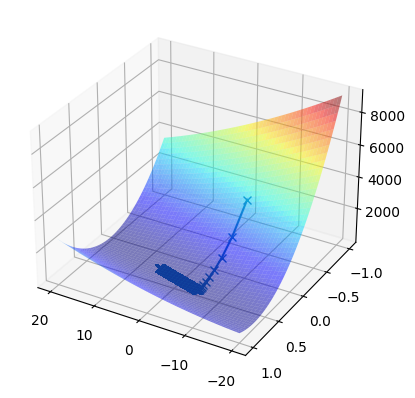

In [98]:
ax = plt.axes(projection='3d')
ax.plot(theta_0_hist, theta_1_hist, cost_hist, 'x-')
ax.plot_surface(theta_0_ax.T, theta_1_ax.T, z, cmap='jet', alpha=0.5)
ax.view_init(elev=30, azim=120)

Text(0, 0.5, 'theta 0')

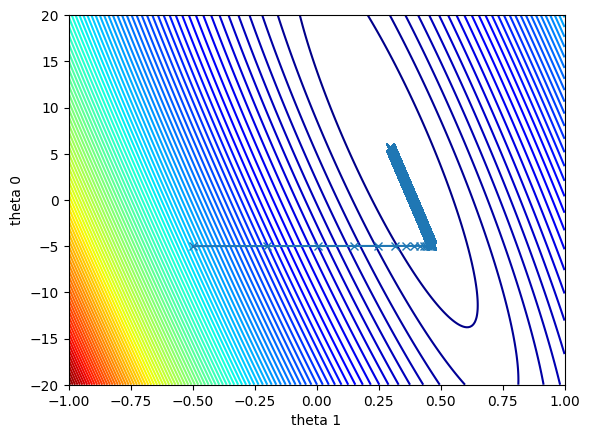

In [108]:
plt.contour(theta_1_ax.T, theta_0_ax.T, z, 100, cmap='jet')
plt.plot(theta_1_hist, theta_0_hist, 'x-')
plt.xlabel('theta 1')
plt.ylabel('theta 0')

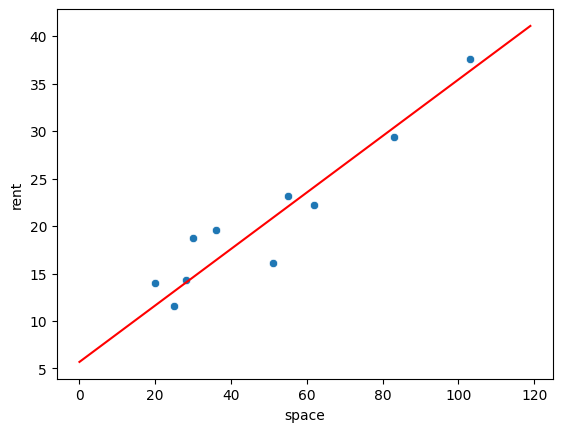

In [109]:
sns.scatterplot(x='space', y='rent', data=df)
x_values = np.arange(120)
y_values = theta_0_hist[-1] + theta_1_hist[-1]*x_values
plt.plot(x_values, y_values, '-', color='r')

In [103]:
cost_hist


[2936.336975965091,
 1418.4319226978257,
 695.3553774140379,
 350.9067888508454,
 186.82305658452816,
 108.65870986702268,
 71.42329446978037,
 53.68496241048108,
 45.23434559508455,
 41.20806514158291,
 39.28938078435924,
 38.374680078536926,
 37.93824141148461,
 37.72962975479031,
 37.629546791722994,
 37.581163058507954,
 37.55740702520677,
 37.54538278035781,
 37.5389471716227,
 37.535173820298176,
 37.53266870392671,
 37.53076775992072,
 37.529154652543404,
 37.52767869072936,
 37.52626809062754,
 37.52488865696989,
 37.52352410034881,
 37.52216666107015,
 37.520812642690984,
 37.519460284356455,
 37.51810874725677,
 37.51675763181153,
 37.515406747673595,
 37.514056004167074,
 37.51270535809585,
 37.51135478888158,
 37.51000428672012,
 37.50865384693984,
 37.50730346731403,
 37.50595314678064,
 37.50460288483244,
 37.50325268122653,
 37.50190253584583,
 37.50055244863328,
 37.49920241956041,
 37.497852448612335,
 37.496502535780664,
 37.49515268106008,
 37.493802884446715,
 37.49